# Resolviendo EDOS con Python

**Nombre:** Heriberto Espino Montelongo

**Materia:** Análisis numérico

**Sección:** 1

**Fecha:** 28/10/2024

## Instrucciones

Considerando el problema de valor inicial (PVI):

Resolver:
$$
\frac{dy}{dt} = f(t, y)
$$
Sujeta a:
$$
y(t_0) = y_0
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# ode 1. Euler's method
def euler(f, t0, tn, n, y0):
    h = abs(tn-t0)/n
    t = np.linspace(t0, tn, n + 1) #Linespace will help us to make tSol [the array with all the intervals]
    y = np.zeros(n + 1) #*remember that tSol and ySol need to have the same size
    y[0] = y0
    for k in range(0, n):
        y[k + 1] = y[k] + h*f(t[k], y[k])
    return y


# ode 2. Runge-Kutta's method
def RK4(f, t0, tn, n, y0):
    h = abs(tn-t0)/n
    t = np.linspace(t0, tn, n + 1) #Linespace will help us to make tSol [the array with all the intervals]
    y = np.zeros(n + 1) #*remember that tSol and ySol need to have the same size
    y[0] = y0
    for k in range(0, n):
        s1 = f(t[k], y[k])
        s2 = f(t[k] + (h/2), y[k]+s1*(h/2))
        s3 = f(t[k] + (h/2), y[k]+s2*(h/2))
        s4 = f(t[k] + h, y[k]+s3*h)
        y[k+1] = y[k] + (h/6)*(s1+(2*s2)+(2*s3)+s4)#### Método de RK4
    return y

def plot_results(x, y_exact, ye, yrk, fig_title):
    fig = plt.figure()
    fig.suptitle(fig_title, fontsize=12)
    plt.plot(x, ye, 'bo', label='Euler')
    plt.plot(x, yrk, 'g-o', label='Runge-Kutta')
    plt.plot(x, y_exact, 'r', label='Sol. analítica')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    return fig;

def multipage(filename, figs=None, dpi=200):

    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()


1. $\frac{dy}{dx} + y = x; \quad y(0) = 4; \quad e^{xy} = x e^x - e^x + c; \quad T_{\text{end}} = 600$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Considerando la solución de la ecuación diferencial y la condición inicial, determine la solución del PVI.

   e) Utilizando el código visto en la clase anterior, realiza una gráfica donde se visualice la solución del PVI de $t_0$ a $T_{\text{end}}$, con $h = 0.5$.

Actual solution: 599.0
Euler: 2.555583766503208e+18
RK4: 5.473330003355588e+57


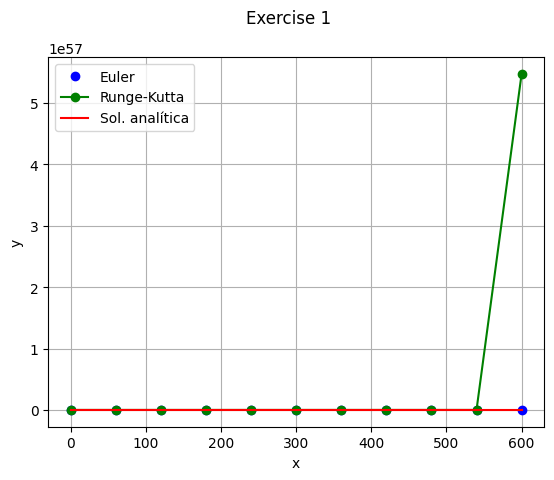

In [3]:
#### Respuesta (a)
def f(x,y):   # parte derecha de la edo y'=f(x,y)
    z = x -y
    return z

#### Respuesta (b)
t0 = 0

#### Respuesta (c)
y0 = 4

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y = x + 5*np.exp(-x)-1
    return y

#### Respuesta (e)
Tend = 600
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 1')

2. $x \frac{dy}{dx} + y = 2x; \quad y(1) = 0; \quad xy = x^2 + c; \quad T_{\text{end}} = 600$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Considerando la solución de la ecuación diferencial y la condición inicial, determine la solución del PVI.

   e) Realiza una gráfica de la solución del PVI de $t_0$ a $T_{\text{end}}$, con $h = 0.5$.

Actual solution: 599.0
Euler: 600.1090538789114
RK4: 599.9983333333332


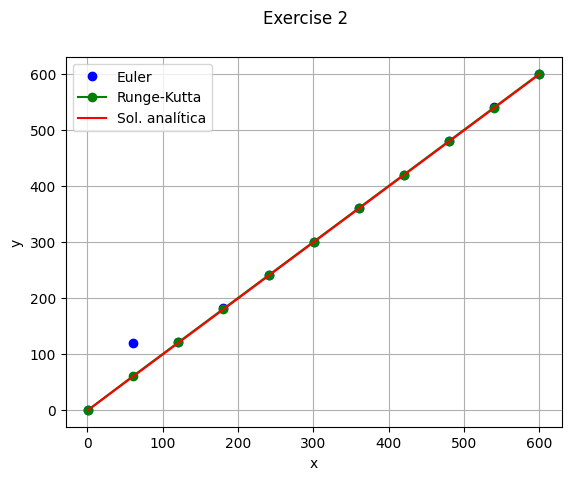

In [4]:
#### Respuesta (a)
def f(x,y):   # parte derecha de la edo y'=f(x,y)
    z = (2*x - y) / x
    return z

#### Respuesta (b)
t0 = 1

#### Respuesta (c)
y0 = 0

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y = x -1
    return y

#### Respuesta (e)

Tend = 600
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 2')

3. $x \frac{dy}{dx} - 4y = x^6 e^x; \quad y(1) = 0; \quad x^{-4}y = x e^x - e^x + c; \quad T_{\text{end}} = 10$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Determine la solución del PVI.

   e) Realiza una gráfica de la solución del PVI de $t_0$ a $T_{\text{end}}$, con $h = 0.5$.

Actual solution: 1982381921.5326047
Euler: 752460314.3459637
RK4: 1981945683.759529


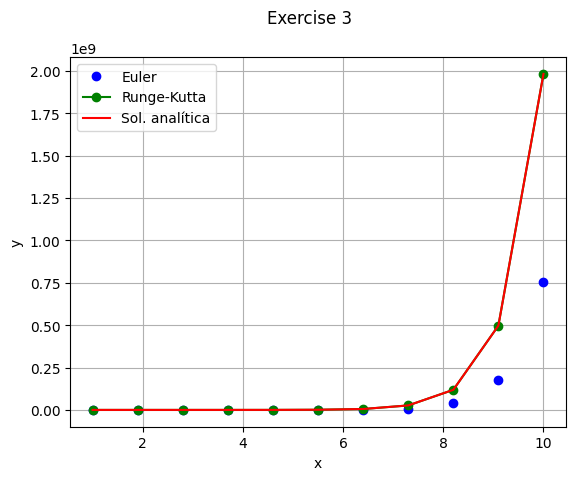

In [5]:
#### Respuesta (a)
def f(x,y):   # parte derecha de la edo y'=f(x,y)
    z = (x**6 * np.exp(x) + 4*y)/x
    return z

#### Respuesta (b)
t0 = 1

#### Respuesta (c)
y0 = 0

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y = x**4*( x * np.exp(x) - np.exp(x) )
    return y

#### Respuesta (e)

Tend = 10
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 3')

4. $\frac{dA}{dt} = kA$, donde $k = -0.00012378$; $A(0) = 100$; $A(t) = c e^{kt}; \quad T_{\text{end}} = 55800$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Determine la solución del PVI.

Actual solution: 0.10008316245902682
Euler: 0.0008015044019350935
RK4: 0.10244978418981104


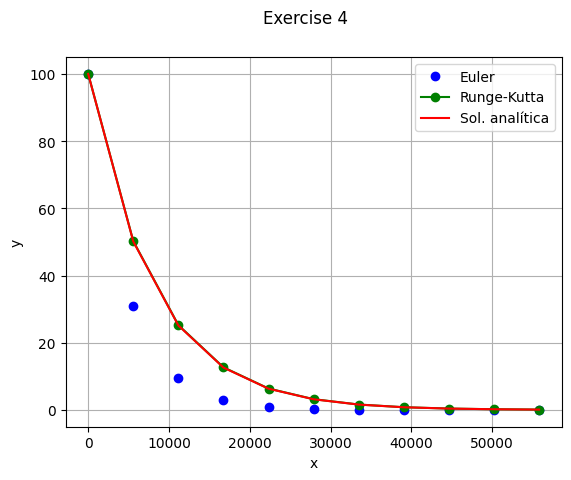

In [6]:
k = -0.00012378
#### Respuesta (a)
def f(x,A):   # parte derecha de la edo y'=f(x,y)
    z = k * A
    return z

#### Respuesta (b)
t0 = 0

#### Respuesta (c)
y0 = 100 

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y = 100 * np.exp(k * x) 
    return y

#### Respuesta (e)

Tend = 55800
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 4')

5. $\frac{dT}{dt} = k(T - T_m)$, donde $k = -0.19018$, $T_m = 70$; $T(0) = 300$; $T(t) = T_m + c e^{kt}; \quad T_{\text{end}} = 60$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Determine la solución del PVI.

   e) Realiza una gráfica de la solución del PVI de $t_0$ a $T_{\text{end}}$, con $h = 0.5$.

Actual solution: 70.00254730156205
Euler: 70.0000007184265
RK4: 70.00385232766448


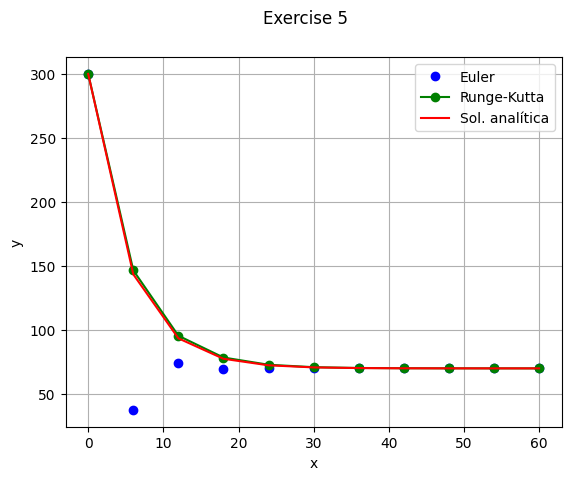

In [7]:
k = -0.19018
T_m = 70

#### Respuesta (a)
def f(x,T):   # parte derecha de la edo y'=f(x,y)
    z = k * (T - T_m)
    return z

#### Respuesta (b)
t0 = 0

#### Respuesta (c)
y0 = 300

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y =  T_m + 230 * np.exp(k * x)
    return y

#### Respuesta (e)

Tend = 60
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 5')


6. $\frac{dA}{dt} + \frac{1}{100}A = 6; \quad A(0) = 50; \quad A(t) = 600 + c e^{-t/100}; \quad T_{\text{end}} = 600$.

   a) Determine a qué es igual $f(t, y)$

   b) Determine el valor de $t_0$.

   c) Determine el valor de $y_0$.

   d) Determine la solución del PVI.

   e) Realiza una gráfica de la solución del PVI de $t_0$ a $T_{\text{end}}$, con $h = 0.5$.


Actual solution: 598.6366863028335
Euler: 599.94232832
RK4: 598.6219999277578


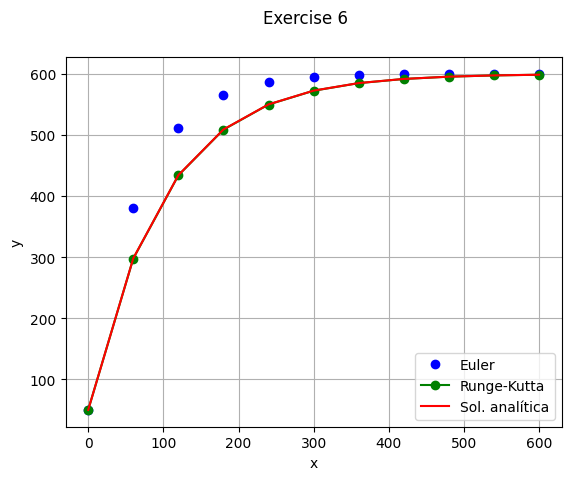

In [8]:
#### Respuesta (a)
def f(x,A):   # parte derecha de la edo y'=f(x,y)
    z = 6 - A/100
    return z

#### Respuesta (b)
t0 = 0

#### Respuesta (c)
y0 = 50

#### Respuesta (d)
def sol_exacta(x):  # solucion analitica (funcion matematico)
    y = 600 - 550 * np.exp(-x / 100)
    return y

#### Respuesta (e)

Tend = 600
n = 10    ### int, numero de subintervalos
x = np.linspace(t0,Tend,n+1)
y_exact = sol_exacta(x)   ### vector que contiene la sol. analitica evaluada en los puntos de x
print('Actual solution:', y_exact[-1])
ye = euler(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode1 (Euler)
print('Euler:', ye[-1])
yrk = RK4(f, t0, Tend, n, y0)  ### vector que contiene la sol. numerica con ode2 (Runge-Kutta)
print('RK4:', yrk[-1])
fig1 = plot_results(x, y_exact, ye, yrk, 'Exercise 6')

In [9]:
id='175199'
multipage(id+'practica 2 de 6' +'.pdf')

C:\Users\herie\AppData\Local\Temp\ipykernel_25292\2083636372.py:45: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  pp.close()
